# **What is Topic Modeling?**
Topic modeling, an essential tool in statistics and natural language processing, encompasses a statistical model designed to reveal the abstract “topics” present in a set of documents. It serves as a powerful text-mining technique, enabling the discovery of concealed semantic structures within a body of text. By employing topic modeling, researchers can gain insights into the underlying themes and concepts embedded in the documents under investigation.

# **Latent Dirichlet Allocation for Topic Modeling**
LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. Given a dataset of documents, LDA backtracks and tries to figure out what topics would create those documents in the first place.

LDA is a matrix factorization technique.

In [1]:
doc1 = "Sugar is bad to consume. My sister likes to have sugar, but not my father."
doc2 = "My father spends a lot of time driving my sister around to dance practice."
doc3 = "Doctors suggest that driving may cause increased stress and blood pressure."
doc4 = "Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better."
doc5 = "Health experts say that Sugar is not good for your lifestyle."

# compile documents
doc_complete = [doc1, doc2, doc3, doc4, doc5]

In [2]:
doc_complete

['Sugar is bad to consume. My sister likes to have sugar, but not my father.',
 'My father spends a lot of time driving my sister around to dance practice.',
 'Doctors suggest that driving may cause increased stress and blood pressure.',
 'Sometimes I feel pressure to perform well at school, but my father never seems to drive my sister to do better.',
 'Health experts say that Sugar is not good for your lifestyle.']

Cleaning and Preprocessing
Cleaning is an important step before any text mining task, in this step, we will remove the punctuations, stopwords and normalize the corpus.

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [9]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]


# **Preparing Document-Term Matrix**

---


All the text documents combined is known as the corpus. To run any mathematical model on text corpus, it is a good practice to convert it into a matrix representation. LDA model looks for repeating term patterns in the entire DT matrix. Python provides many great libraries for text mining practices, “gensim” is one such clean and beautiful library to handle text data. It is scalable, robust and efficient. Following code shows how to convert a corpus into a document-term matrix.
---



In [10]:
# Importing Gensim
import gensim
from gensim import corpora

In [11]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

In [12]:
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

# **Running LDA Model**
Next step is to create an object for LDA model and train it on Document-Term matrix. The training also requires few parameters as input which are explained in the above section. The gensim module allows both LDA model estimation from a training corpus and inference of topic distribution on new, unseen documents.

In [13]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [14]:
# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)

In [15]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.079*"driving" + 0.045*"doctor" + 0.045*"cause"'), (1, '0.057*"sister" + 0.057*"father" + 0.056*"pressure"'), (2, '0.135*"sugar" + 0.054*"like" + 0.054*"consume"')]


**What did you understand from the results!**

Each line is a topic with individual topic terms and weights. Topic1 can be termed as Bad Health, and Topic3 can be termed as Family.

References :https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/

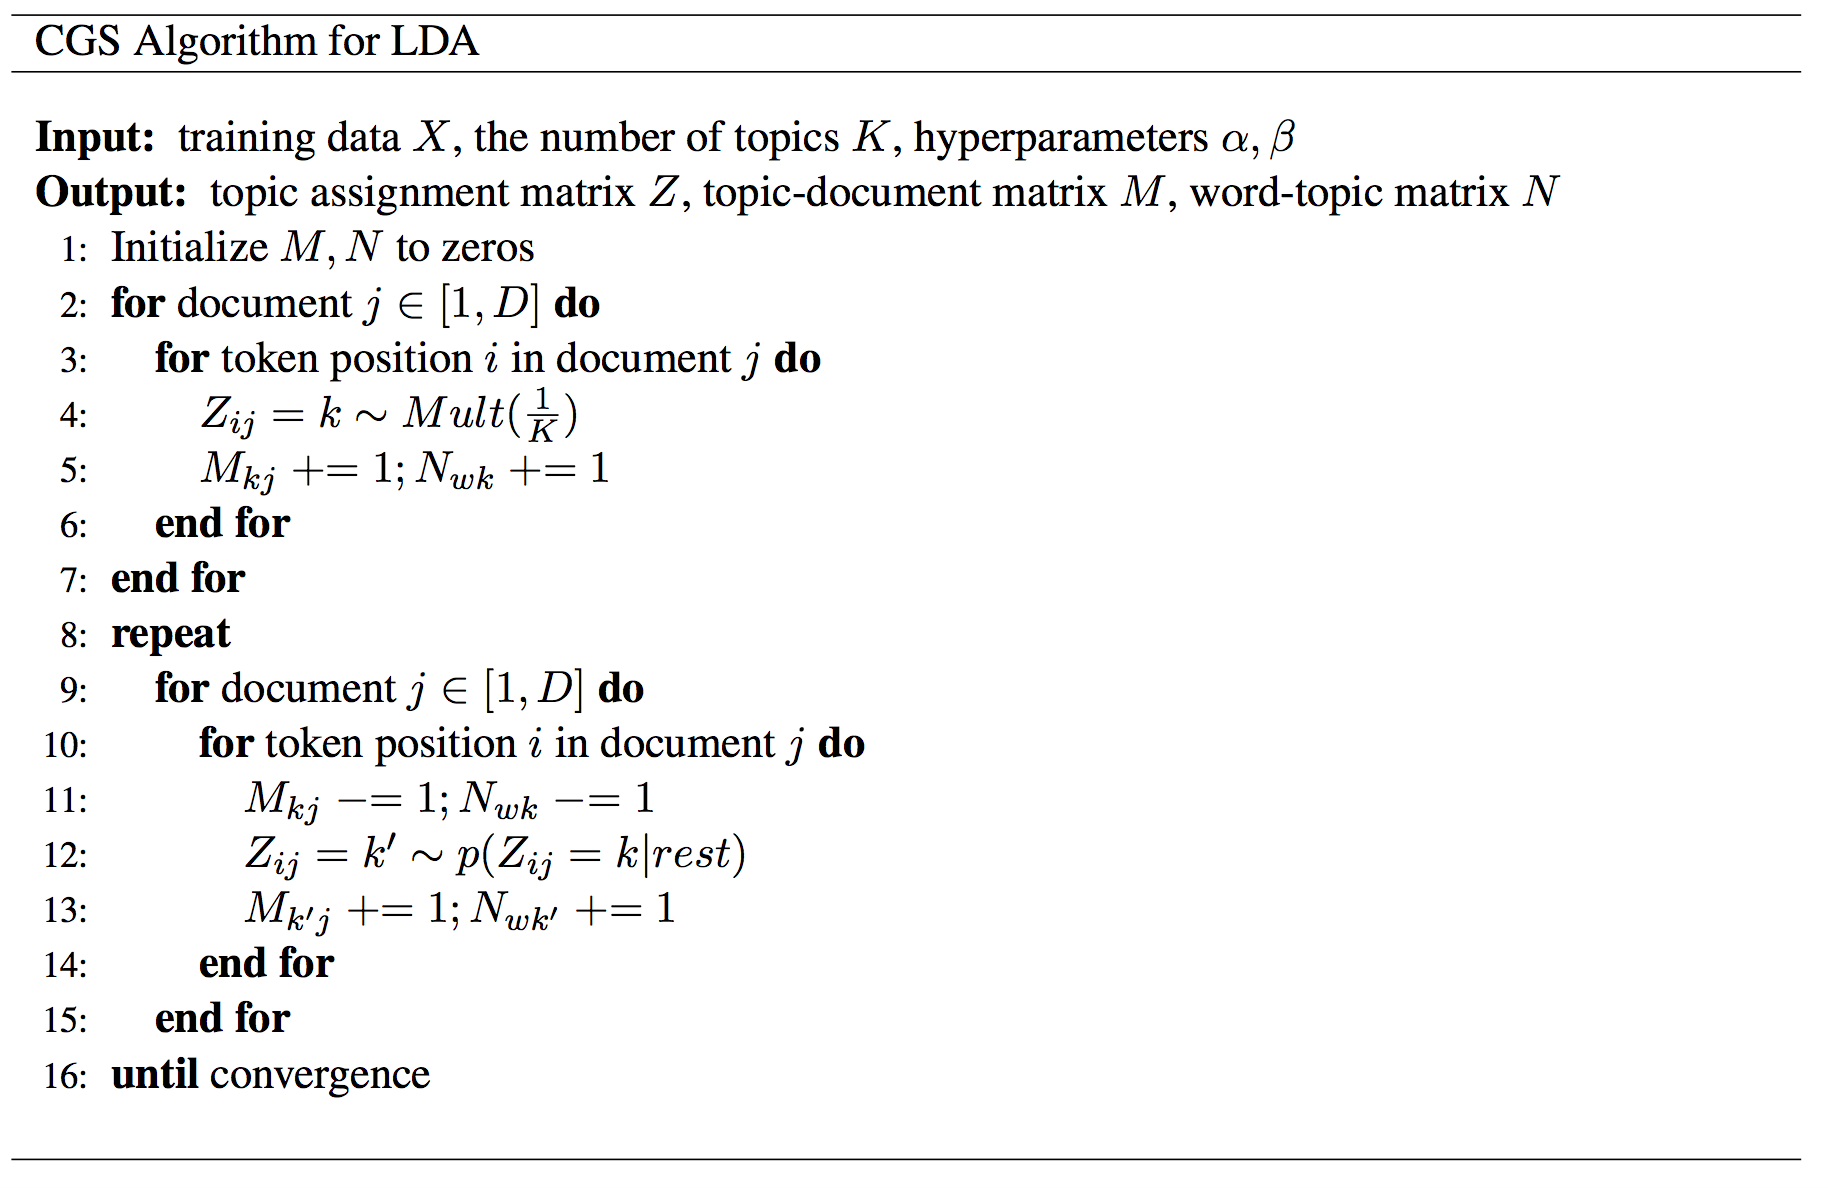